<h2 align="center"> Zoo Animal Classification/Avance II </h2>
<h2 align="center"> Equipo1. Grupo: 001, Lunes-Miércoles-Viernes/6:00p.m.-7:00p.m. </h2>
<h2>Integrantes:</h2>
<ul style="list-style-type:circle;">
  <li>1884110, Garcia Villarreal Lizeth Guadalupe</li>
  <li>1884095, Mata Monsiváis Angel Alfonso</li>
  <li>1739252, Ontiveros Castillo Emmanuel</li>
</ul> 

## Motivación.

- El reino animal, con su infinidad de formas, características y cualidades es un área que ha sido de gran interés para diferentes ciencias durante la historia de la humanidad. Sinembargo es a la vez un lugar al cual queda mucho por conocer. Por tal motivo, por medio de este proyecto se intentará realizar clasificaciones de animales que van más allá de lo obvio en base a un árbol de decisiones. 

<h2> Preguntas de interés.</h2>
<ul style="list-style-type:circle;">
  <li>¿Las características más concluyentes son referentes a la agrupación de animales para las especies “mamíferos”, “aves” y “ peces”?.</li>
  <li>¿Podemos hacer un clasificador con las características importantes?</li>
</ul> 

In [1]:
#Importar librerías
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
from matplotlib.colors import ListedColormap

## 1. Lectura y limpieza de datos.

* Cargar datos de tabla Zoo y tabla Clases en su respectivo data frame para su manipulación. El data frame zoo contiene las características de los animales. El data frame zooClas contiene las clases (1: Mammal, 2: Bird, 3: Reptile, 4: Fish, 5: Amphibian, 6: Bug, 7: Invertebrate) a las que pertenecen los animales.


In [2]:
#Primera tabla.
zoo = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/zoo.csv')
#Segunda tabla.
zooClass = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/class.csv')

* Encabezado de Zoo (Primera tabla), visualización previa. Se puede observar que los valores que contiene son en binario (1,0) verdadero o falso, a excepción de dos columnas las cuales son legs que contienen el número de piernas del animal, y class_type que contiene el número de la clase de animal que pertenece haciendo referencia al segundo data frame zooClass.


In [3]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


* Verificación de valores de la tabla Zoo y valores nulos.

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* Verificación de la suma de los valores nulos que contenga.

In [5]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

_No hay valores nulos en este data frame de zoo._

* Verificación en busca de animales duplicados de la columna animal_name de la tabla Zoo.

In [6]:
duplicates = zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

_Aparece frog repetido dos veces._

* Se mostrará a continuación estos duplicados de frog para ver la semejanza que hay en sus características para tomarse una decisión.

In [7]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


_Se encontró en sus características que una frog es venenosa y otra no. Por tal solo se cambiara el nombre par distinguir._

* Se nombró distinto las 2 tipos de frog poniendo la que es venenosa como venoumos_frog en la columa animal_name.

In [8]:
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = 'venoumous_frog'

/home/mata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Comprobación de estas frog nuevamente.

In [9]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [10]:
venoumous_frog = zoo.loc[zoo['animal_name'] == 'venoumous_frog']
venoumous_frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


* Como se menciona anteriormente, legs es el único que no está en binario así que se verá que valores numéricos tiene.

In [11]:
print(zoo.legs.unique())

[4 0 2 6 8 5]


_Es curioso que haya animales con 5 piernas así que veremos de cuáles se trata._

In [12]:
zoo.loc[zoo['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


_Una estrella de mas con 5 puntas como piernas parece valido._

* Encabezado de clases, visualización previa (Segunda tabla).

In [13]:
zooClass

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


* Verificando valores de tabla class.

In [14]:
zooClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


* Unión de ambos data frame de zoo y zooClass para tener una sola tabla y tener mas optima y concreta la información con los cambios hechos anteriormente como la corrección de la rana venenosa y la rana.

In [15]:
unir = pd.merge(zoo,zooClass,how='left',left_on='class_type',right_on='Class_Number')
unir.head(100)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,...,0,2,1,0,1,2,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


* Guardado de el data frame de la unión en un .cvs para su manipulación.

In [16]:
header = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type','Class_Number','Number_Of_Animal_Species_In_Class','Class_Type','Animal_Names']
unir.to_csv('zooAndClass.csv',columns = header, index=False)
lol = pd.read_csv('zooAndClass.csv')
lol

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


## 2. Estadistica


#### Se hace necesario aclarar algunas asociaciones implícitas que no son completamente claras al momento de utilizar técnicas de estadística descriptiva tales como moda, media, medidas de dispersión, etc.

- Total de los animales pertenecientes a cada clase.

In [17]:

pd.Series.value_counts(lol['class_type'])

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

<ul style="list-style-type:circle;">
  <li>1. 	41	Mammal</li>
  <li>2. 	20	Bird</li>
  <li>3. 	5	Reptile</li>
  <li>4. 	13	Fish</li>
  <li>5. 	4	amfibios</li>
  <li>6. 	8	Bug</li>
  <li>7. 	10	Invertebrate</li>
</ul> 

- Mapa de correlaciones.

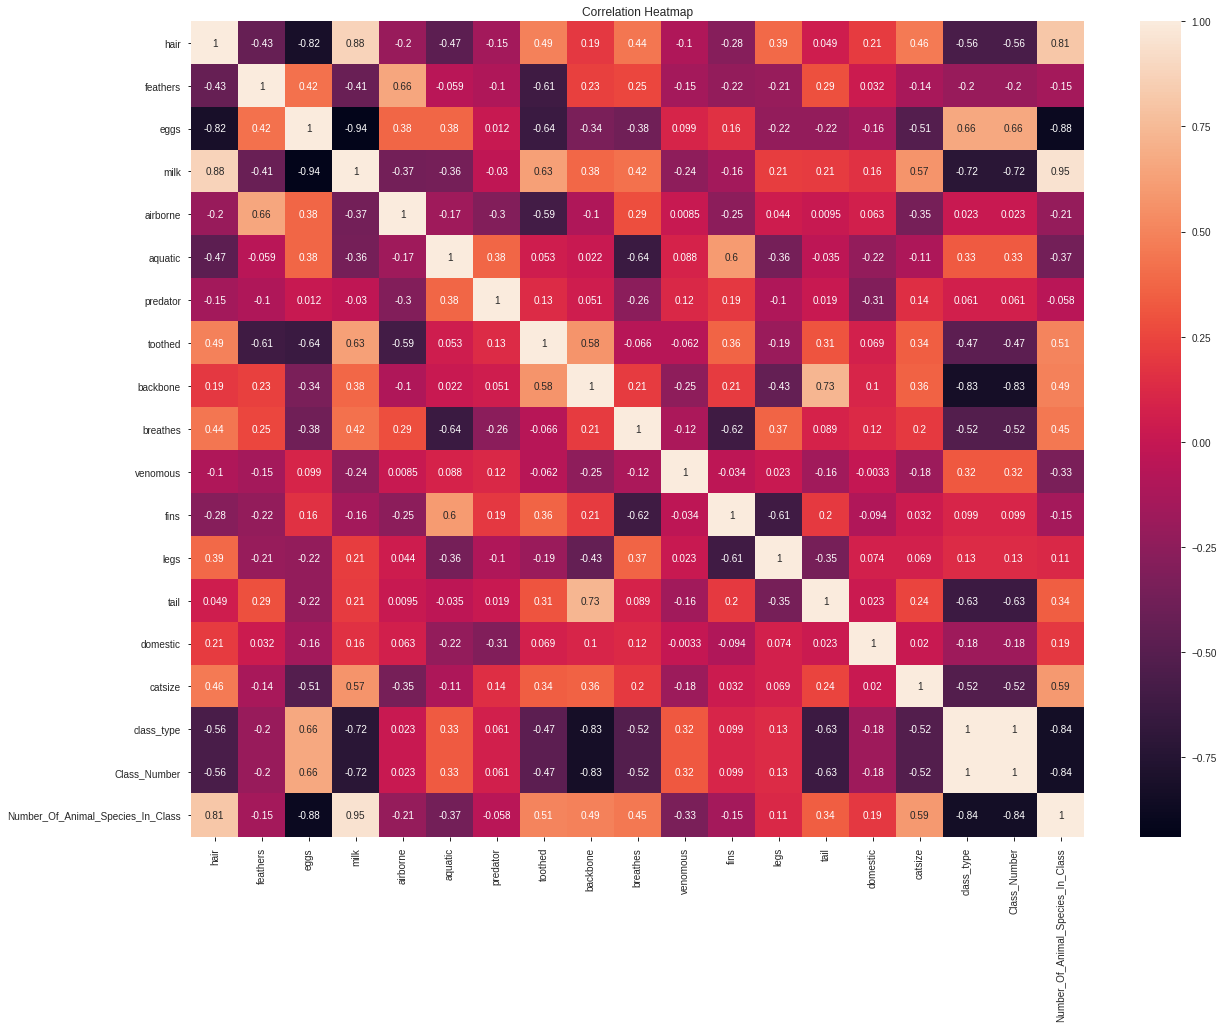

In [18]:

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = lol.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

_Si observamos la barra que se encuentra al costado derecho, esta muestra un indicador del 0.8 al -0.8 donde denotan 
    0.8: mayor relación entre dos variables.
    -0.8: menor relación entre dos variable._
    
_Ahora bien, las correlaciones más altas siempre van a ser las variables relacionadas consigo mismas, por ejemplo hair-hair, eggs-eggs, milk-milk, etc. Podemos verlo claramente en la línea diagonal._

_Las correlaciones medias son las que están entre el 0.8 y 0.4, por ejemplo eggs-feathers, hair-toothed, hair-breathes, etc._

_Las correlaciones bajas son las que están entre 0.0 y 0.4, por ejemplo breathes-backbone, legs-hair, predator-aquatic, etc._

_Entonces, este mapa de correlación nos ayuda a verificar qué característica tiene probabilidad de relacionarse con otra y ambas tengan coherencia con alguna especie._

_Mostrando correlaciones que son mayores que 0.7 (positivo o negativo)_

In [19]:
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,class_type,Class_Number,Number_Of_Animal_Species_In_Class
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN,NaN,0.810689
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN,NaN,-0.880370
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683,-0.723683,0.953684
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845,-0.828845,NaN
tail,NaN,NaN,NaN,0.731762,NaN,NaN,NaN,NaN
class_type,NaN,NaN,-0.723683,-0.828845,NaN,NaN,NaN,-0.835864
Class_Number,NaN,NaN,-0.723683,-0.828845,NaN,NaN,NaN,-0.835864
Number_Of_Animal_Species_In_Class,0.810689,-0.880370,0.953684,NaN,NaN,-0.835864,-0.835864,NaN


_Se puede extraer de la tabla que hay alta correlación entre animales con las características de pelo y leche,columna vertebral y cola. También que hay muy poca correlación entre huevos y cabello,leche y huevos._

## 3. Graficas


- Apreciación visual de lo que se vio en la parte de estadistica sobre cuantos animales están en cada especie.

/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


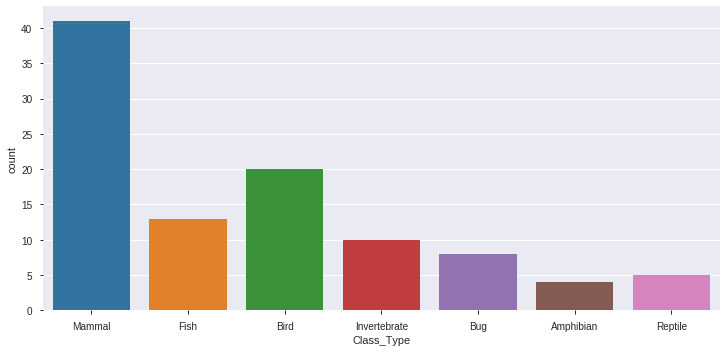

In [20]:
#Vea a qué clase pertenecen la mayoría de los animales del zoológico
sns.factorplot('Class_Type', data=lol, kind="count",size = 5,aspect = 2)


_Las asociaciones más frecuentes serán relacionadas a los mamíferos después a las aves y siguen los peces.._

- Algunas características concluyentes por cada clase.

[]

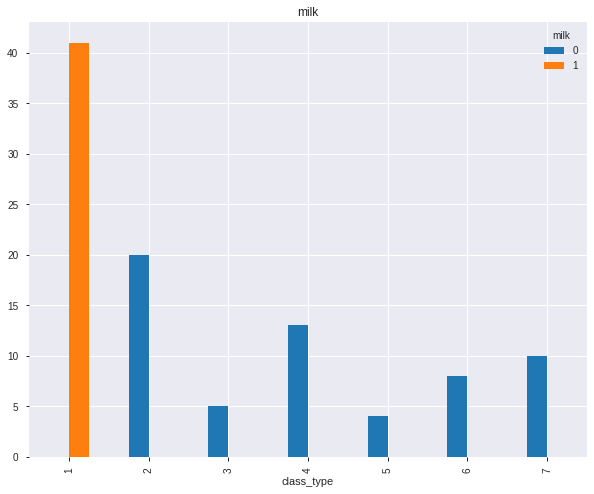

In [75]:
pd.crosstab(lol.class_type, lol.milk).plot(kind="bar", figsize=(10, 8), title="milk");
plt.plot()

_En esta gráfica se concluye que son los mamíferos los únicos que dan leche, si consideramos que 0 es falso y 1 es verdadero._

[]

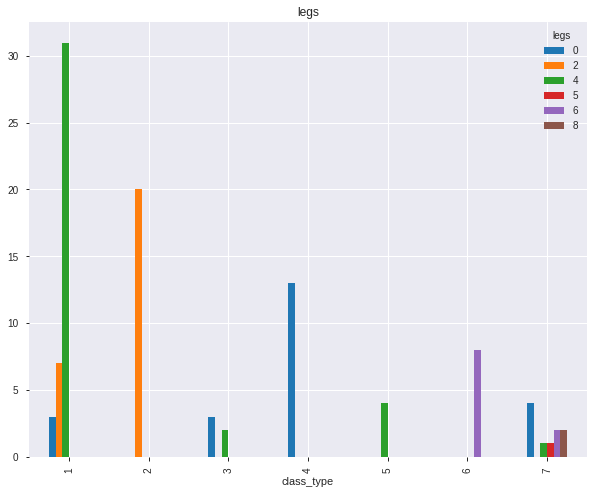

In [40]:

pd.crosstab(lol.class_type, lol.legs).plot(kind="bar", figsize=(10, 8), title="legs");
plt.plot()

_De acuerdo con la gráfica, donde el eje y denota el tipo de clase (Mammal (1), Bird (2), Reptile (3), Fish (4), Amfibios (5), Bug (6), Invertebrate (7)) y el eje x denota la cantidad de piernas, se concluye que al menos una minoría de los mamíferos, reptiles e invertebrados no tiene piernas, mientras que la mayoría de los peces tampoco tiene; que son más las aves, que los mamíferos, las que tienen dos piernas; que son más los mamíferos, que los reptiles, anfibios e invertebrados, los que tienen cuatro piernas; que sólo un invertebrado tiene cinco piernas; que son más los insectos, que los invertebrados, los que tienen seis piernas y, por último, que una minoría de los invertebrados tiene ocho piernas._

[]

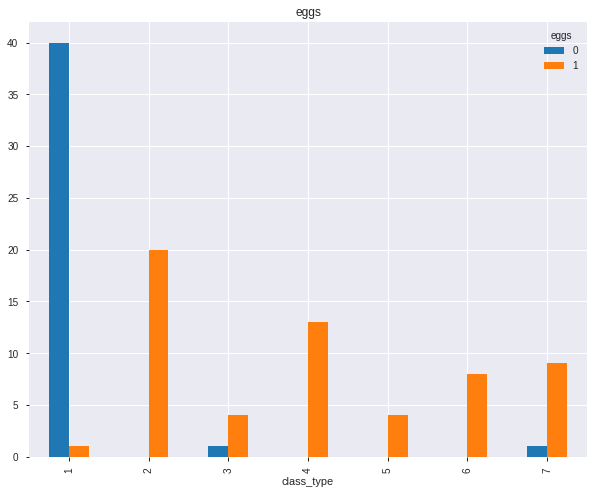

In [38]:

pd.crosstab(lol.class_type, lol.eggs).plot(kind="bar", figsize=(10, 8), title="eggs");
plt.plot()

_Siguiendo la lógica de la gráfica anterior (0 es falso y 1 es verdadero), en esta se concluye que la mayoría de los mamíferos y una minoría de los reptiles e invertebrado, no ponen huevos, mientras que la mayoría de las demás especies sí lo hacen._

[]

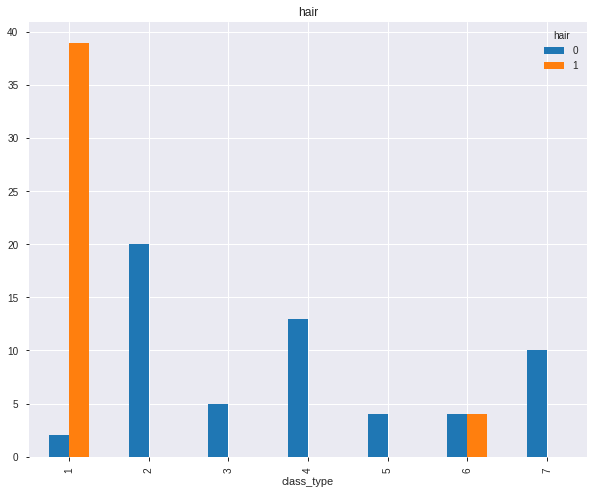

In [77]:

pd.crosstab(lol.class_type, lol.hair).plot(kind="bar", figsize=(10, 8), title="hair");
plt.plot()

_En esta gráfica se concluye que la mayoria de los mamíferos tienen cola._

[]

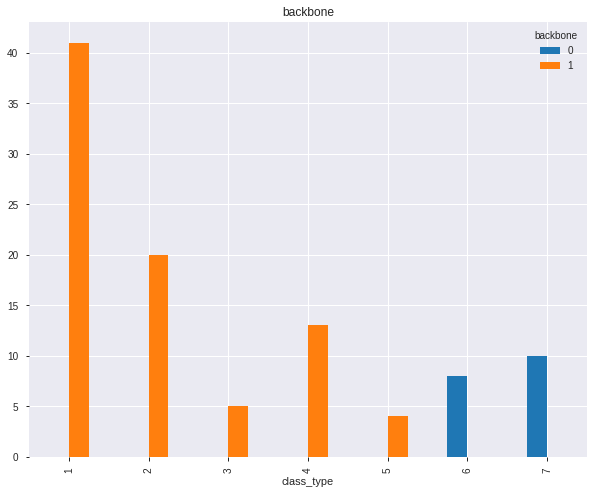

In [43]:
pd.crosstab(lol.class_type, lol.backbone).plot(kind="bar", figsize=(10, 8), title="backbone");
plt.plot()

_En esta gráfica se concluye que los mamíferos, las aves, los reptiles, los peces y los anfibios no tienen columna vertebral, mientras que las demás especies sí la tienen._

_En conclusión, las gráficas nos han ayudado a identificar las especies que posean la carcaterística definida. Aunque sólo se elegieron cinco, funcionará con cualquier otra que queramos definir en el eje x._

## Decision Tree Classification

In [26]:

#train test split into 80/20
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

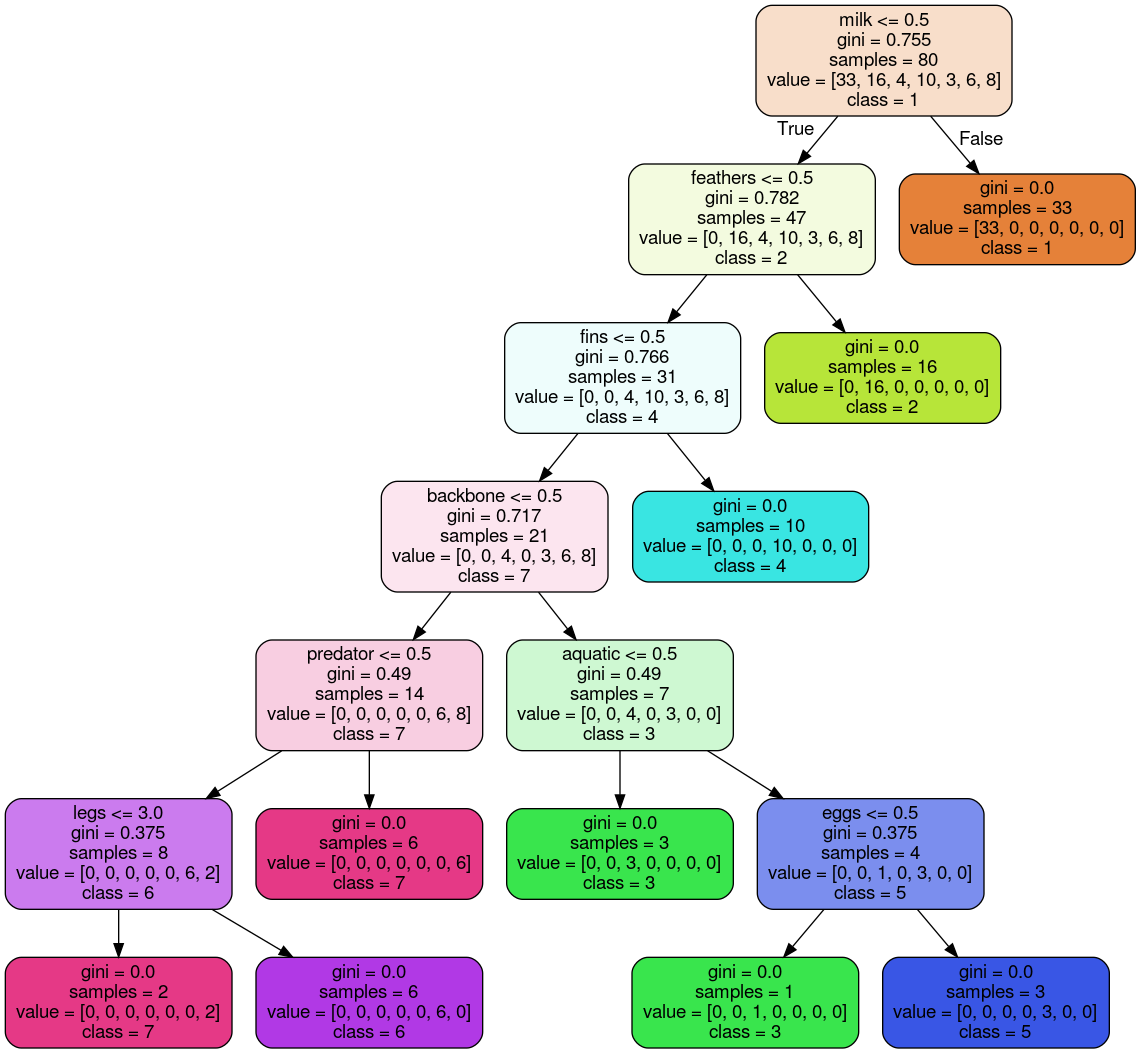

In [27]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(X_test)

scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
scores.append(score)

global tree  
# Get the tree
tree = []
tree = clf

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

_Conforme a los resultados obtenidos del algoritmo, se pudo determinar las variables que caracterizan mejor a las clases de especie. Así pues, sepuede inferir que el atributo milk=si (amantan) es la que mejor caracteriza a la clase 1(mamíferos), además es la de mayor peso (cantidad de miembros) y confianza 100% (%uso del atributo), por lo tanto, es considerada la raíz del árbol. Cabe destacar que este atributo en particular obtuvo un mayor índice de ganancia con respecto a los demás atributos. Por otro lado, el atributo Feathers=si (poseen plumas) caracteriza demejor forma a la clase 2 (aves), así este atributo encabeza la rama izquierda del árbol.  La variable Fins=si (posee aletas) es la que mejorcaracteriza la clase 4 (pez). La variable Backbone=si (posee espina dorsal) es la que mejor caracteriza la clase 3 (reptil) también es caracterizada. La variable predator=si (es predador) es la que mejorcaracteriza la clase 7 (invertebrados)._

In [28]:
#use cross validation score since this is a small size dataset 
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

/home/mata/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.8, 1. , 1. , 1. ])

In [29]:
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.96 (+/- 0.13)


## Random Forest Classifier

## Conclusion

Así pues, sería de mucho interés responder a la pregunta con la tecnica de arboles:
¿Cuáles son las características principales que permiten clasificar un animal dentrode una determinada especie u otra?

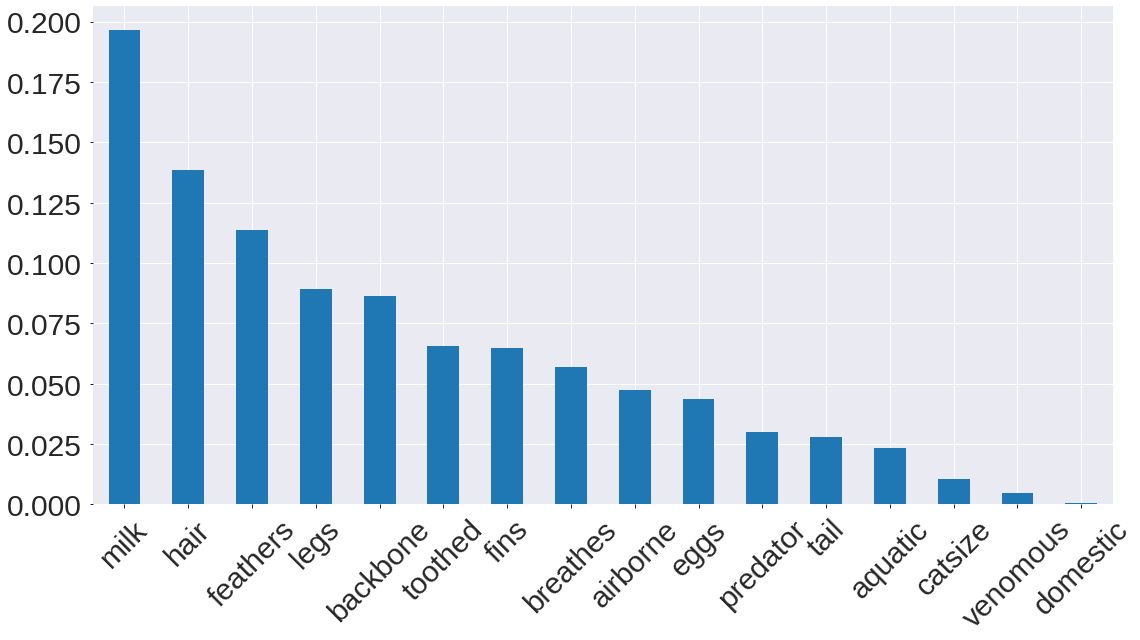

In [30]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scores.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [31]:

#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

/home/mata/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Random Forest Accuracy: 0.97 (+/- 0.09)
